In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline  

from sklearn.linear_model import LinearRegression

# Some data wrangling

In [123]:
avr_house_prices = pd.read_csv('Average-prices-2020-10.csv')

first_time_buyers = pd.read_csv('First-Time-Buyer-Former-Owner-Occupied-2020-10.csv')

print(first_time_buyers.columns, avr_house_prices.columns)

Index(['Date', 'Region_Name', 'Area_Code', 'First_Time_Buyer_Average_Price',
       'First_Time_Buyer_Index', 'First_Time_Buyer_Monthly_Change',
       'First_Time_Buyer_Annual_Change', 'Former_Owner_Occupier_Average_Price',
       'Former_Owner_Occupier_Index', 'Former_Owner_Occupier_Monthly_Change',
       'Former_Owner_Occupier_Annual_Change'],
      dtype='object') Index(['Date', 'Region_Name', 'Area_Code', 'Average_Price', 'Monthly_Change',
       'Annual_Change', 'Average_Price_SA'],
      dtype='object')


In [124]:
first_time_buyers_2 = first_time_buyers[['Date', 'Region_Name','First_Time_Buyer_Average_Price']]

first_time_buyers_3 = first_time_buyers_2[ first_time_buyers_2['Date'] < '2020-01-01'].dropna()

first_time_buyers_4 = first_time_buyers_3[ first_time_buyers_3['Date'] >= '2019-05-01'].dropna()

first_time_buyers_4

,Date,Region_Name,First_Time_Buyer_Average_Price
37092,2019-05-01,Scotland,123174.8681
37093,2019-05-01,England,205510.8724
37094,2019-05-01,Wales,139641.7727
37095,2019-05-01,Outer London,354284.1213
37096,2019-05-01,Inner London,503794.3192
...,...,...,...
40423,2019-12-01,Shropshire,174468.1194
40424,2019-12-01,Wiltshire,215635.7306
40425,2019-12-01,Bedford,234467.4968
40426,2019-12-01,Central Bedfordshire,245302.8533


In [125]:
avr_house_prices_2 = avr_house_prices[['Date', 'Region_Name','Average_Price']]

avr_house_prices_3 = avr_house_prices_2[avr_house_prices_2['Date'] >= '2020-01-01'].dropna()

avr_house_prices_3 = avr_house_prices_2[ avr_house_prices_2['Date'] < '2020-01-01'].dropna()

avr_house_prices_4 = avr_house_prices_3[ avr_house_prices_3['Date'] >= '2019-05-01'].dropna()

avr_house_prices_4.head()

,Date,Region_Name,Average_Price
124277,2019-05-01,Scotland,151416.6801
124278,2019-05-01,England,244928.0826
124279,2019-05-01,Wales,161628.0883
124280,2019-05-01,Northern Ireland,136960.0380
124281,2019-05-01,Outer London,415785.6700


In [126]:
first_time_buyers_5 = first_time_buyers_4.groupby(['Region_Name']).mean()

avr_house_prices_5 = avr_house_prices_4.groupby(['Region_Name']).mean()

#### Total County/ towns first time buyer avr price ets

In [127]:
total_df = pd.merge(avr_house_prices_5, first_time_buyers_5, how='inner', on=['Region_Name']).reset_index()

total_df.columns = ['Region', 'Average_Price', 'First_Time_Buyer_Average_Price']

total_df = total_df.set_index('Region')

total_df.head()

,Average_Price,First_Time_Buyer_Average_Price
Region,,
Aberdeenshire,185772.565863,147565.603738
Adur,316619.987187,267596.968250
Allerdale,153209.895850,132714.469700
Amber Valley,177332.427062,153964.930512
Angus,147671.248850,120405.232300


#### Adding Unemployment rates

In [128]:
unempl = pd.read_csv('Employment_June_to_August_2019.csv')

unempl.columns # ['Region', 'Employment_16 _to_64_years','Unemployment_16_years_and_over', '
                        # Inactivity rate_16_to_64_years']

# pd.unique(unempl['Region']).size

unempl = unempl.set_index('Region')

unempl.head()

,Employment_16 _to_64_years,Unemployment_16_years_and_over,Inactivity rate_16_to_64_years
Region,,,
UK,75.9,3.9,21.0
Great Britain,76.0,3.9,20.8
England,76.3,3.9,20.6
North East,71.2,5.8,24.2
North West,74.5,4.1,22.2


#### Merge with Unemployment Data and First time home buyers data by region

In [129]:
df_both = pd.merge(total_df, unempl, how='inner', on=['Region'])#.reset_index()

df_both['Average_Price'].size

#df_both.head()

#df_both.columns

df_both

,Average_Price,First_Time_Buyer_Average_Price,Employment_16 _to_64_years,Unemployment_16_years_and_over,Inactivity rate_16_to_64_years
Region,,,,,
East Midlands,193960.672587,163313.189838,76.6,4.5,19.6
England,247876.475675,207920.869462,76.3,3.9,20.6
Great Britain,234604.070162,195290.394012,76.0,3.9,20.8
London,472880.310138,412993.502088,74.2,4.6,22.2
North East,129979.226200,111714.393437,71.2,5.8,24.2
Scotland,153081.675862,124192.578375,74.3,4.1,22.5
South East,321724.123550,257532.747637,79.2,3.1,18.1
South West,256521.400988,211463.949413,81.0,2.4,17.0
Wales,165370.528612,142883.710400,74.1,4.2,22.5


# Define the arrays

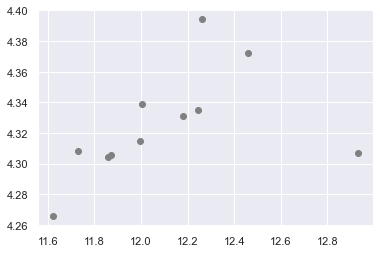

In [130]:
# avr_price_array = df_both['Average_Price'].to_numpy()

frist_time_avr_price_array = df_both['First_Time_Buyer_Average_Price'].to_numpy()

employ_array = df_both['Employment_16 _to_64_years'].to_numpy()

unemploy_array = df_both['Unemployment_16_years_and_over'].to_numpy()

inact_array = df_both['Inactivity rate_16_to_64_years'].to_numpy()

plt.scatter(np.log(frist_time_avr_price_array), np.log(employ_array), color='gray');

In [131]:
# data prep
x_vals = np.log(employ_array)
y_vals = np.log(frist_time_avr_price_array)

x_vals = np.reshape(x_vals, (-1,1))
y_vals = np.reshape(y_vals, (-1,1))
x_vals.shape

(11, 1)

# OLS with Scikit-learn

In [249]:
reg = LinearRegression().fit(x_vals, y_vals)
reg.score(x_vals, y_vals)

0.20272387193327035

In [36]:
print('Model coefficient:', reg.coef_ , 'Model slope:', reg.intercept_)

Model coefficient: [[4.72539798]] Model slope: [-8.33201425]


In [250]:
pred = reg.predict(x_vals)

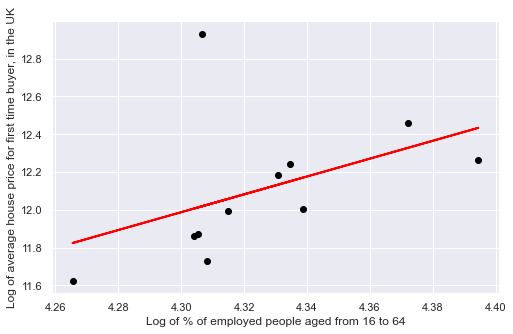

In [251]:
fig = plt.figure(figsize=(8,5))

plt.scatter(x_vals, y_vals, color='black', marker = 'o')
plt.plot(x_vals, pred, color='red', linewidth = 2)

plt.xlabel("Log of % of employed people aged from 16 to 64")
plt.ylabel("Log of average house price for first time buyer, in the UK")

fig.savefig('OLS_with_London_outlier.png', dpi=300)

In [252]:
RSS_Scikit_learn = sum( (y_vals - pred)**2 )
RSS_Scikit_learn

array([1.09118955])

In [ ]:
sns.residplot(pred.reshape(-1),'waiting', data=faithful,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

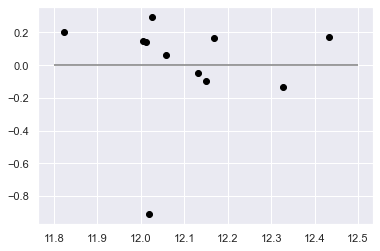

In [24]:
residuals = pred - y_vals

plt.scatter(pred, residuals, color = 'black')

plt.hlines(y=0, xmin=11.8, xmax=12.5, color='grey')

#plt.ylim(-1,1)

C:\Users\iveli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

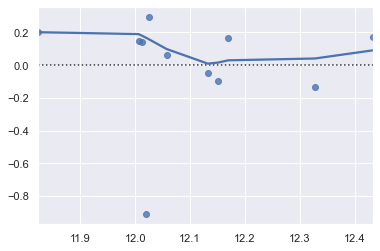

In [26]:
sns.residplot(pred,residuals, lowess=True)

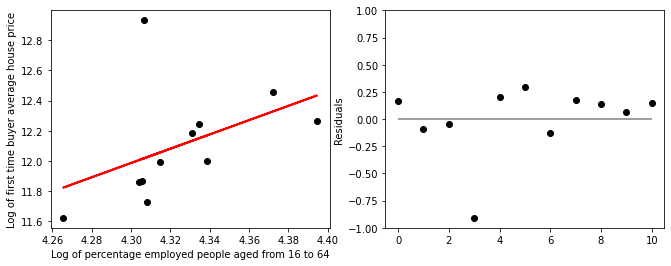

In [21]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))

ax1.scatter(x_vals, y_vals, color='black', marker = 'o')
ax1.plot(x_vals, prediction, color='red', linewidth = 2)

ax1.set_xlabel('Log of percentage employed people aged from 16 to 64')
ax1.set_ylabel('Log of first time buyer average house price')

ax2.scatter(range(0,residuals.size), residuals, color = 'black')
ax2.hlines(y=0, xmin=0, xmax=10, color='grey')


ax2.set_ylabel('Residuals')
ax2.set_ylim([-1, 1])

fig.tight_layout()

In [22]:
# fig1.savefig('Least_squares_with_London.png', dpi=300)

# The ordinary least squares method MM


Think it would owrk with data where n>m i.e more columns than rows.

## First iterate calculations - finding bottom vector A for data

In [212]:
# data prep
# x_vals = np.log(employ_array)
# y_vals = np.log(frist_time_avr_price_array)

x_vals 
# y_vals

array([[4.33859708],
       [4.33467294],
       [4.33073334],
       [4.30676415],
       [4.26549282],
       [4.30811095],
       [4.3719763 ],
       [4.39444915],
       [4.30541553],
       [4.31481788],
       [4.30406509]])

In [213]:
X = np.append(np.ones((x_vals.shape[0],1)), x_vals,axis = 1)
X_T = X.T
X_T

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [4.33859708, 4.33467294, 4.33073334, 4.30676415, 4.26549282,
        4.30811095, 4.3719763 , 4.39444915, 4.30541553, 4.31481788,
        4.30406509]])

In [142]:
X_T.shape

(2, 11)

In [214]:
# p-value is 1

norm = np.linalg.norm(X_T, ord=1, axis=1).reshape(-1,1) # row wise norm
norm

array([[11.        ],
       [47.57509524]])

In [215]:
alpha = np.absolute(X_T)/norm
alpha

array([[0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
        0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
        0.09090909],
       [0.09119471, 0.09111223, 0.09102942, 0.0905256 , 0.0896581 ,
        0.09055391, 0.09189632, 0.09236869, 0.09049726, 0.09069489,
        0.09046887]])

In [146]:
np.square(X_T)/alpha

array([[ 11.        ,  11.        ,  11.        ,  11.        ,
         11.        ,  11.        ,  11.        ,  11.        ,
         11.        ,  11.        ,  11.        ],
       [206.40916913, 206.22247787, 206.03505112, 204.89471462,
        202.93122708, 204.95878883, 207.9971888 , 209.06633706,
        204.830554  , 205.27787182, 204.76630673]])

In [216]:
A = np.sum(np.square(X_T)/alpha, axis=1)
A  ## bottom vector

array([ 121.        , 2263.38968706])

In [217]:
A = A.reshape(2,1)
A

array([[ 121.        ],
       [2263.38968706]])

In [166]:
A.shape

(2, 1)

-------

In [148]:
# initial values of parameters

beta = np.ones((2,1))
beta

array([[1.],
       [1.]])

In [150]:
pred = np.matmul(X_T.T, beta)
pred  # 11,1

array([[5.33859708],
       [5.33467294],
       [5.33073334],
       [5.30676415],
       [5.26549282],
       [5.30811095],
       [5.3719763 ],
       [5.39444915],
       [5.30541553],
       [5.31481788],
       [5.30406509]])

In [172]:
y_vals - pred

array([[6.66482797],
       [6.91023991],
       [6.85150959],
       [7.62442299],
       [6.35820802],
       [6.42147774],
       [7.08692587],
       [6.86736066],
       [6.56437083],
       [6.67877629],
       [6.55588706]])

In [153]:
res = np.matmul(X_T, (y_vals - pred))
res

array([[ 74.58400693],
       [322.62276625]])

In [175]:
res/A + beta

array([[1.61639675],
       [1.14253965]])

# OLS Example with MM

## OLS Example 1

In [245]:
# initial values of parameters

# A is A for all 

beta = np.array([[-2],[2]])
b = 0

for i in range(0,50):
    
    pred = np.matmul(X_T.T, beta)  
    
    res = np.matmul(X_T, (y_vals - pred))
    
    beta = res/A + beta
    
    b = i
    
    # print('For i = {}, beta is {}'.format(b,beta))

In [246]:
pred = beta[1]*x_vals + beta[0]
# pred

Text(0, 0.5, 'Log of the average house price for a first time buyer')

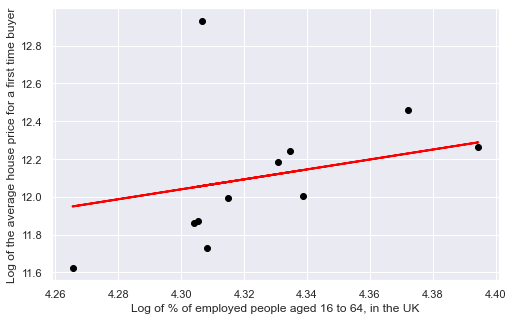

In [247]:
fig = plt.figure(figsize=(8,5))

plt.scatter(x_vals, y_vals, color='black', marker = 'o')
plt.plot(x_vals, pred,  color='red', linewidth = 2)

plt.xlabel("Log of % of employed people aged 16 to 64, in the UK")
plt.ylabel("Log of the average house price for a first time buyer")

# fig.savefig('LAD_with_London_outlier.png', dpi=300)

In [248]:
RSS1 = sum( (y_vals - pred)**2 )
RSS1

array([1.14569598])

## OLS Example 2

In [238]:
# initial values of parameters

# A is A for all 

beta = np.zeros((2,1))
b = 0

for i in range(0,50):
    
    pred = np.matmul(X_T.T, beta)  
    
    res = np.matmul(X_T, (y_vals - pred))
    
    beta = res/A + beta
    
    b = i
    
    # print('For i = {}, beta is {}'.format(b,beta))

In [240]:
pred = beta[1]*x_vals + beta[0]
# pred

Text(0, 0.5, 'Log of the average house price for a first time buyer')

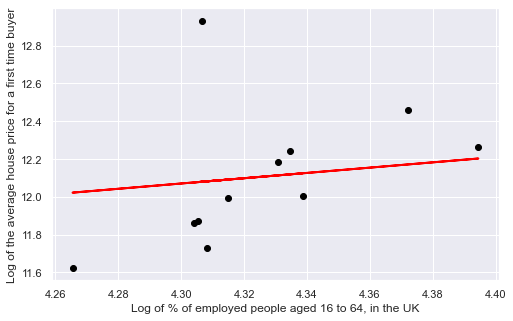

In [241]:
fig = plt.figure(figsize=(8,5))

plt.scatter(x_vals, y_vals, color='black', marker = 'o')
plt.plot(x_vals, pred,  color='red', linewidth = 2)

plt.xlabel("Log of % of employed people aged 16 to 64, in the UK")
plt.ylabel("Log of the average house price for a first time buyer")

# fig.savefig('LAD_with_London_outlier.png', dpi=300)

In [244]:
RSS2 = sum( (y_vals - pred)**2 )
RSS2

array([1.2286019])

## OLS Example 3

In [277]:
# initial values of parameters

# A is A for all 

# beta = np.array([[-10],[2]]) we like
# beta = np.array([[-10],[5]])  ## perfect starting point! = Scikit-learn regression!
beta = np.array([[-2],[2]])
b = 0

for i in range(0,50):
    
    pred = np.matmul(X_T.T, beta)  
    
    res = np.matmul(X_T, (y_vals - pred))
    
    beta = res/A + beta
    
    b = i
    
    print('For i = {}, beta is {}'.format(b,beta))

For i = 0, beta is [[-1.50405858]
 [ 2.11468327]]
For i = 1, beta is [[-1.09829421]
 [ 2.20851576]]
For i = 2, beta is [[-0.76631082]
 [ 2.28528859]]
For i = 3, beta is [[-0.49469347]
 [ 2.34810356]]
For i = 4, beta is [[-0.27246637]
 [ 2.3994985 ]]
For i = 5, beta is [[-0.09064932]
 [ 2.44154981]]
For i = 6, beta is [[0.05810506]
 [2.47595635]]
For i = 7, beta is [[0.17980826]
 [2.50410811]]
For i = 8, beta is [[0.27937875]
 [2.52714234]]
For i = 9, beta is [[0.36084072]
 [2.54598951]]
For i = 10, beta is [[0.42748668]
 [2.56141091]]
For i = 11, beta is [[0.48201048]
 [2.57402943]]
For i = 12, beta is [[0.5266162 ]
 [2.58435468]]
For i = 13, beta is [[0.56310714]
 [2.59280363]]
For i = 14, beta is [[0.59295874]
 [2.59971743]]
For i = 15, beta is [[0.61737818]
 [2.6053752 ]]
For i = 16, beta is [[0.63735313]
 [2.61000531]]
For i = 17, beta is [[0.6536917 ]
 [2.61379462]]
For i = 18, beta is [[0.66705505]
 [2.616896  ]]
For i = 19, beta is [[0.67798414]
 [2.61943453]]
For i = 20, beta i

In [278]:
pred = beta[1]*x_vals + beta[0]
# pred

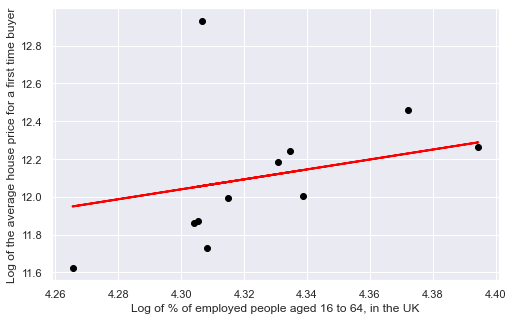

In [282]:
fig = plt.figure(figsize=(8,5))

plt.scatter(x_vals, y_vals, color='black', marker = 'o')
plt.plot(x_vals, pred,  color='red', linewidth = 2)

plt.xlabel("Log of % of employed people aged 16 to 64, in the UK")
plt.ylabel("Log of the average house price for a first time buyer")

fig.savefig('OLS_with_London_outlier.png', dpi=300)

In [280]:
RSS3 = sum( (y_vals - pred)**2 )
print('MM', RSS3, 'Scikit-learn:' ,RSS_Scikit_learn)

MM [1.14569598] Scikit-learn: [1.09118955]


# Trying to find OLS accurate code using a small example i made

In [27]:
z = np.array([ [1,2],[4,6],[8,10] ])
z

array([[ 1,  2],
       [ 4,  6],
       [ 8, 10]])

In [30]:
s=2
z/s

array([[0.5, 1. ],
       [2. , 3. ],
       [4. , 5. ]])

In [29]:
t = np.array([ [2,2],[2,2],[2,2] ])
z/t

array([[0.5, 1. ],
       [2. , 3. ],
       [4. , 5. ]])

Element-wise squaring of a matrix

z = np.array([[0,1],[2,4]])

np.square(z)

np.power(z, 2)

In [186]:
X = np.array([[1, -1, 2], [-1, 2, 2]])
X # 2,3 matrix

array([[ 1, -1,  2],
       [-1,  2,  2]])

The bottom vector

In [187]:
# p-value is 1

norm = np.linalg.norm(X, ord=1, axis=1).reshape(2,1) # row wise norm
norm

array([[4.],
       [5.]])

In [188]:
alpha = np.absolute(X)/norm
alpha

array([[0.25, 0.25, 0.5 ],
       [0.2 , 0.4 , 0.4 ]])

In [189]:
np.square(X)

array([[1, 1, 4],
       [1, 4, 4]], dtype=int32)

In [190]:
np.square(X)/alpha

array([[ 4.,  4.,  8.],
       [ 5., 10., 10.]])

In [191]:
A = np.sum(np.square(X)/alpha, axis=1)
A

array([16., 25.])

In [122]:
# np.linalg.inv(A)

Getting the top vector

In [192]:
y = 2*X[0] + 1.78*X[1]
y = y.reshape(3,1)
y.shape #3,1
y

array([[0.22],
       [1.56],
       [7.56]])

In [193]:
beta = np.ones((2,1))
beta

array([[1.],
       [1.]])

In [86]:
X

array([[ 1, -1,  2],
       [-1,  2,  2]])

In [194]:
pred = np.matmul(X.T, beta)
pred  # 3,1

array([[0.],
       [1.],
       [4.]])

In [195]:
np.matmul(X, (y - pred))

array([[6.78],
       [8.02]])

In [196]:
np.matmul(X, (y - pred))/A.reshape(2,1)

array([[0.42375],
       [0.3208 ]])

In [200]:
# initial values of parameters

# A is A for all 

beta = np.zeros((2,1))
b = 0

for i in range(0,50):
    
    pred = np.matmul(X.T, beta)  
    
    res = np.matmul(X, (y - pred))
    
    beta = res/A.reshape(2,1) + beta
    
    b = i
    
    print('For i = {}, beta is {}'.format(b,np.round(beta,4)))

For i = 0, beta is [[0.8612]
 [0.7208]]
For i = 1, beta is [[1.3545]
 [1.1477]]
For i = 2, beta is [[1.6361]
 [1.4011]]
For i = 3, beta is [[1.7962]
 [1.5521]]
For i = 4, beta is [[1.8869]
 [1.6423]]
For i = 5, beta is [[1.9379]
 [1.6964]]
For i = 6, beta is [[1.9664]
 [1.729 ]]
For i = 7, beta is [[1.9822]
 [1.7487]]
For i = 8, beta is [[1.9908]
 [1.7607]]
For i = 9, beta is [[1.9955]
 [1.768 ]]
For i = 10, beta is [[1.9979]
 [1.7725]]
For i = 11, beta is [[1.9992]
 [1.7753]]
For i = 12, beta is [[1.9998]
 [1.777 ]]
For i = 13, beta is [[2.    ]
 [1.7781]]
For i = 14, beta is [[2.0001]
 [1.7788]]
For i = 15, beta is [[2.0002]
 [1.7792]]
For i = 16, beta is [[2.0002]
 [1.7795]]
For i = 17, beta is [[2.0001]
 [1.7797]]
For i = 18, beta is [[2.0001]
 [1.7798]]
For i = 19, beta is [[2.0001]
 [1.7799]]
For i = 20, beta is [[2.0001]
 [1.7799]]
For i = 21, beta is [[2.    ]
 [1.7799]]
For i = 22, beta is [[2.  ]
 [1.78]]
For i = 23, beta is [[2.  ]
 [1.78]]
For i = 24, beta is [[2.  ]
 [1.78

# The absolute least deviation method

Model $ y = \theta_0 + \theta_1 x_1 + \epsilon $

coef update rule : $ \[ X^T WX \]^{-1} X^T Wy $

Data: employent in an area 
Prediction: First time buyers avr price of a house

In [35]:
# fig2.savefig('Least_squares_no_London.png', dpi=300)

# https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/bulletins/regionallabourmarket/october2019#:~:text=Regional%20unemployment&text=The%20highest%20unemployment%20rate%20estimate%20in%20the%20UK%20for%20June,Northern%20Ireland%2C%20at%202.9%25.

# https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/bulletins/uklabourmarket/december2020

# https://www.gov.uk/government/statistical-data-sets/uk-house-price-index-data-downloads-august-2020

### IDK

In [45]:
X = np.append(np.ones((x_vals.shape[0],1)), x_vals,axis = 1)
X.shape

(11, 2)

In [42]:
y = y_vals
y

array([[12.00342505],
       [12.24491285],
       [12.18224293],
       [12.93118714],
       [11.62370083],
       [11.72958869],
       [12.45890217],
       [12.26180981],
       [11.86978636],
       [11.99359418],
       [11.85995216]])

In [95]:
# initial guess 
beta_update = np.zeros(X.shape[1])

W = 1/np.absolute(y.T - np.matmul(beta_update.T,X.T))
W

array([[0.08330956, 0.08166657, 0.08208669, 0.07733242, 0.08603112,
        0.08525448, 0.08026389, 0.08155403, 0.08424751, 0.08337784,
        0.08431737]])

In [96]:
M = np.zeros((11,11))
M

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [97]:
np.fill_diagonal(M, W)
np.round(M,2)

array([[0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08]])

In [78]:
M.shape

(11, 11)

## The loop 

In [98]:
# initial guess 
beta_update = np.zeros(X.shape[1])
M = np.zeros((11,11))
b=0

for i in range(100):
    
    # create diagonal matrix
    W = 1/np.absolute(y.T - np.matmul(beta_update.T,X.T))    
    np.fill_diagonal(M, W)
    
    # inversing the matrix
    inv = np.linalg.inv(np.matmul(np.matmul(X.T,M),X))
    
    # calculating the theta update    
    beta_update = np.matmul(np.matmul( np.matmul(inv,X.T),M) , y)
    
    b = i+1
    
    print("Iteration {} gives beta {}".format(i, np.round(beta_update,2)))

Iteration 0 gives beta [[-8.95]
 [ 4.87]]
Iteration 1 gives beta [[-14.31]
 [  6.1 ]]
Iteration 2 gives beta [[-16.98]
 [  6.71]]
Iteration 3 gives beta [[-18.57]
 [  7.08]]
Iteration 4 gives beta [[-19.28]
 [  7.25]]
Iteration 5 gives beta [[-19.4 ]
 [  7.27]]
Iteration 6 gives beta [[-19.45]
 [  7.28]]
Iteration 7 gives beta [[-19.5]
 [  7.3]]
Iteration 8 gives beta [[-19.55]
 [  7.31]]
Iteration 9 gives beta [[-19.6 ]
 [  7.32]]
Iteration 10 gives beta [[-19.65]
 [  7.33]]
Iteration 11 gives beta [[-19.69]
 [  7.34]]
Iteration 12 gives beta [[-19.74]
 [  7.35]]
Iteration 13 gives beta [[-19.78]
 [  7.36]]
Iteration 14 gives beta [[-19.82]
 [  7.37]]
Iteration 15 gives beta [[-19.86]
 [  7.38]]
Iteration 16 gives beta [[-19.9 ]
 [  7.39]]
Iteration 17 gives beta [[-19.94]
 [  7.4 ]]
Iteration 18 gives beta [[-19.98]
 [  7.41]]
Iteration 19 gives beta [[-20.01]
 [  7.42]]
Iteration 20 gives beta [[-20.04]
 [  7.42]]
Iteration 21 gives beta [[-20.07]
 [  7.43]]
Iteration 22 gives beta 

In [93]:
pred = beta_update[1]*x_vals + beta_update[0]
pred

array([[12.17191658],
       [12.14248909],
       [12.11294567],
       [11.93319845],
       [11.62370084],
       [11.94329824],
       [12.42223052],
       [12.59075659],
       [11.92308504],
       [11.99359417],
       [11.91295797]])

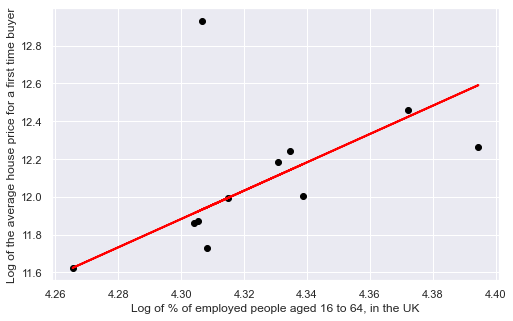

In [103]:
fig = plt.figure(figsize=(8,5))

plt.scatter(x_vals, y, color='black', marker = 'o')
plt.plot(x_vals, pred,  color='red', linewidth = 2)

plt.xlabel("Log of % of employed people aged 16 to 64, in the UK")
plt.ylabel("Log of the average house price for a first time buyer")

fig.savefig('LAD_with_London_outlier.png', dpi=300)